In [69]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This df of longitudes and lagitudes was taken from https://inkplant.com/code/state-latitudes-longitudes. The locations represent roughly the center of each state, including DC.

In [2]:
df = pd.read_csv('Data/ultrasignup/state_data.csv')
df.head()

,state,lat,lng
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


I will build a list of urls using the lat and lngs taken above, this will send requests to the server and return a JSON file with all the races within 200 miles of the location over the next year. Also, the search query caps results at 100. Additionally, searches are all done from the approximate center of the state. So states like California are at a disadvantage due to the long geography of the state. These are saved in another file for confidentiality.

In [89]:
from local import URLS

# A note about courtesy

If anyone wants the extracted data, I will upload a csv file with everything in it so that we do not need to continually hit the ultrasignup servers. 

I am also going to comment out the following cell so that I do not accidentally run it again.

In [18]:
# responses = []

for url in URLS:
    # responses.append(requests.get(url))

In [26]:
parsed = []
for r in responses:
    parsed.append(json.loads(r.text))

In [40]:
for i in range(len(df.state)):
    df.loc[i, 'number of races'] = int(len(parsed[i]))

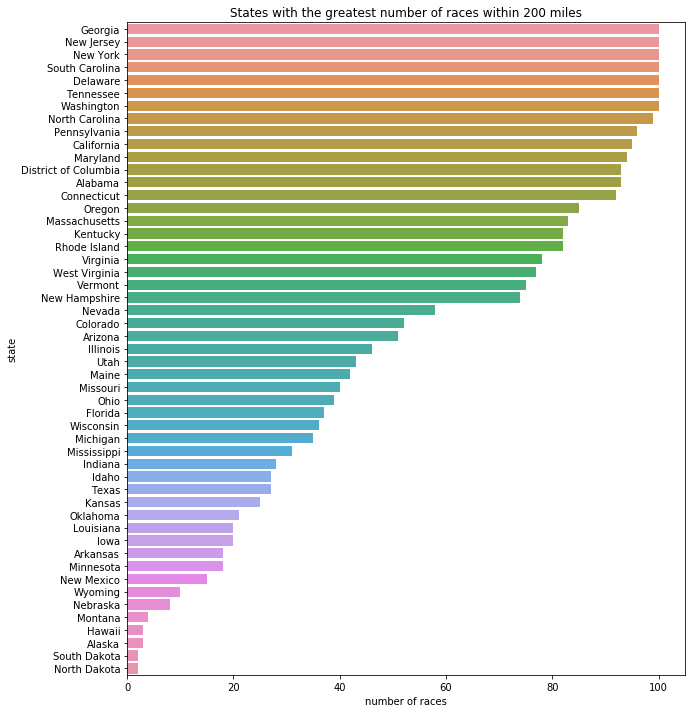

In [83]:
plt.figure(figsize=(10,12))

sns.barplot(y='state', x='number of races', data=df.sort_values(by='number of races',ascending=False))

plt.title('States with the greatest number of races within 200 miles')
plt.show()

# Exporting the data

In [85]:
# Check what each event entry looks like

parsed[0][0]

{'BannerId': '558d0c31-cb64-4bfd-84cb-7925d266bd56',
 'City': 'Dacula',
 'DistanceCategories': ' non',
 'Distances': '10K, 5K',
 'EventDate': '9/28/2019',
 'EventDateId': 33484,
 'EventDistances': None,
 'EventId': 9536,
 'EventImages': [{'ImageId': 'fe5ba3a9-6296-4722-9d75-285b9f033105',
   'ImageLabel': None}],
 'EventName': 'Dirty Spokes Georgia Harbins Park 10K/5K Trail Run',
 'EventType': 0,
 'EventWebsite': 'http://www.dirtyspokes.com/harbins-park-run/',
 'GroupId': 194,
 'GroupName': 'Dirty Spokes Production',
 'Latitude': '33.9102',
 'Location': '',
 'Longitude': '-83.8527',
 'State': 'GA'}

In [63]:
event_df = pd.DataFrame()

In [64]:
# Create index for df that increments everytime the inner loop is ran
index = 0

for i in range(len(df.state)):
    for j in range(len(parsed[i])):
        d = parsed[i][j]
        event_df.loc[index, 'City'] = d['City']
        event_df.loc[index, 'Distances'] = d['Distances']
        event_df.loc[index, 'Data'] = d['EventDate']
        event_df.loc[index, 'Name'] = d['EventName']
        event_df.loc[index, 'Website'] = d['EventWebsite']
        event_df.loc[index, 'State'] = d['State']
        event_df.loc[index, 'Latitude'] = d['Latitude']
        event_df.loc[index, 'Longitude'] = d['Longitude']
        
        index = index +1

In [65]:
# Many duplicates exist due to some events showing up in multiple searches

event_df = event_df.drop_duplicates(subset='Name')
event_df.index = range(len(event_df.City))

In [84]:
event_df.head()

,City,Distances,Data,Name,Website,State,Latitude,Longitude
0,Dacula,"10K, 5K",9/28/2019,Dirty Spokes Georgia Harbins Park 10K/5K Trail...,http://www.dirtyspokes.com/harbins-park-run/,GA,33.9102,-83.8527
1,Suwanee,"12hrs, 8hrs",10/5/2019,A Stroll in the Park,http://ultrasignup.com,GA,34.072,-84.1182
2,Dahlonega,"100K, 50K Run, 1/2 Marathon Run",10/5/2019,The Bull Mountain Epic,http://www.dumassevents.com,GA,34.5828,-84.1443
3,Forsyth,"5K, Fun Run",10/5/2019,Mission Possible 5K and Fun Run,https://sites.google.com/view/mchfh/support/mi...,GA,33.0274,-83.9326
4,Forsyth,"12hrs, 6hrs",10/5/2019,CAMMO Catfish Crawl 6 & 12Hr Endurance Run,https://www.facebook.com/CammoForKids/,GA,33.1249,-83.9446


In [67]:
event_df.to_csv('Data/ultrasignup/extracted_ultra_data.csv')